# Projeto Bônus

A partir da adoção de um sistema de bandejas, será formulado um modelo cálculo para meta de recomendações semanais convertidas em vendas por uma equipe de baristas.

## Importando arquivos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel('Controle de bandejas.xlsx')
df

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396.368520,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986.444517,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857.375154,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881.167437,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013.036839,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887.643108,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
72,2023,46,48.89,215,951,11.041927,15.830892,908.880952,40,12.316690,...,0.225852,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738
73,2023,47,48.89,215,933,11.255394,15.258149,864.968547,38,3.109620,...,0.230219,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608
74,2023,48,48.89,215,920,11.423441,14.714601,744.054561,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ano                             76 non-null     int64  
 1   Semana                          76 non-null     int64  
 2   Ideal, valor                    76 non-null     float64
 3   Meta ideal                      76 non-null     int64  
 4   Meta ajustada                   76 non-null     int64  
 5   Semanal, valor                  76 non-null     float64
 6   Recomendada, valor              76 non-null     float64
 7   vendas realizadas (bandejas)    76 non-null     float64
 8   total de conversões             76 non-null     int64  
 9   Equiv. product line             76 non-null     float64
 10  Conversões + Equiv. Prod. Line  76 non-null     float64
 11  meta de conversões              76 non-null     float64
 12  Dif. Meta/conversões            76 non

## Análise Univariada

Não foi necessária análise de nulos, pois o dataframe foi construído sem nulos por este que vos fala.

In [5]:
df['vendas realizadas (bandejas)'] = df['vendas realizadas (bandejas)'].astype('int')
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.225852,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,0.230219,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594


In [6]:
df.describe()

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2022.644737,29.973684,43.957500,245.894737,1046.697368,10.285513,12.980598,914.052632,50.697368,26.807581,...,0.234919,0.024607,0.025149,0.679746,0.108939,0.115102,0.027471,0.043593,0.031230,1.031230
std,0.481773,14.071222,3.856042,25.049593,86.097777,0.711668,2.327586,164.587881,22.573152,20.071875,...,0.016272,0.208107,0.010102,0.054071,0.054582,0.022467,0.011539,0.006097,0.023744,0.023744
min,2022.000000,1.000000,33.920000,215.000000,843.000000,8.611724,0.000000,396.000000,0.000000,0.000000,...,0.212955,-0.229839,0.000000,0.606496,0.000000,0.026484,0.012478,0.029500,0.000000,1.000000
25%,2022.000000,19.750000,41.340000,232.000000,1006.250000,9.879286,12.331429,807.500000,33.000000,12.665371,...,0.223217,-0.070655,0.019603,0.638848,0.045914,0.102469,0.020081,0.039686,0.014098,1.014098
50%,2023.000000,32.000000,45.300000,232.000000,1038.500000,10.187034,13.417273,902.000000,47.000000,23.298206,...,0.230501,-0.000053,0.022741,0.661738,0.125781,0.116764,0.024799,0.043466,0.023502,1.023502
75%,2023.000000,41.250000,45.350000,259.000000,1070.500000,10.626998,14.097093,1020.000000,67.500000,38.094779,...,0.244908,0.072234,0.029146,0.731092,0.153869,0.128439,0.033409,0.047478,0.041583,1.041583
max,2023.000000,52.000000,48.890000,310.000000,1260.000000,12.459713,16.690074,1306.000000,119.000000,92.065858,...,0.301396,1.488706,0.052488,0.806860,0.180491,0.182273,0.077360,0.056307,0.118857,1.118857


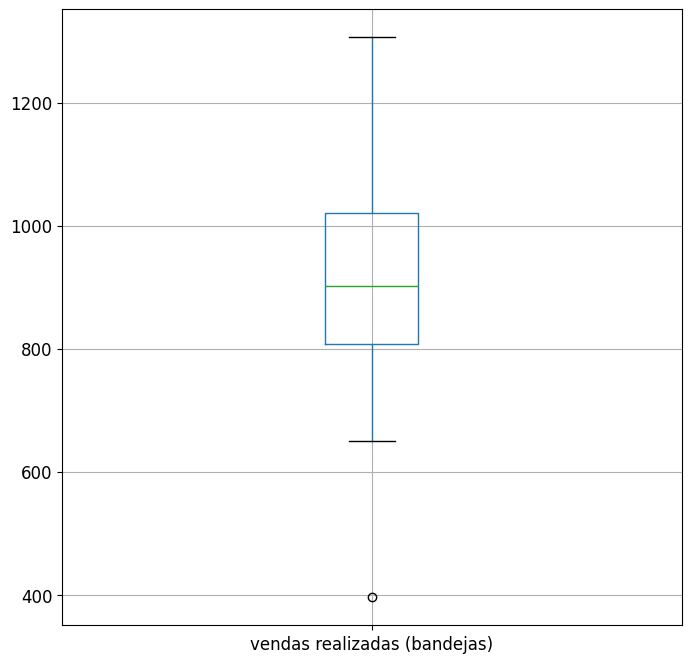

In [7]:
df.boxplot('vendas realizadas (bandejas)',figsize= (8,8), fontsize='large');

In [8]:
df.boxplot('total de conversões',figsize= (8,8), fontsize='large');

### Criando marcação de data

Formato isocalendar: (YYYY,WW,D), onde o primeiro dia da semana é segunda, e o último é domingo. Como no BI a semana começa na segunda e termina no domingo, os dados de cada semana ficam acumulados para o domingo (i.e. weekday = 7).

É preciso criar uma coluna de data, formando a tupla isocalendar com a coluna ano, combinada com a coluna semana, combinada com o número 7 e aplicando a função date.fromisocalendar(year, week, day).

Primeiro será criada a coluna isoformat, depois a coluna data.

In [9]:
def create_date_from_year_week(year, week):
    """ creates timestamp object from year and week numbers, standardized day is Sunday"""
    return pd.Timestamp.fromisocalendar(year, week, 7)

In [10]:
create_date_from_year_week(2022, 32)

Timestamp('2022-08-14 00:00:00')

In [11]:
dataframe_copy = df.copy() #criando uma cópia para manipulação dos dados de análise
year = dataframe_copy['Ano']
week = dataframe_copy['Semana']
date_year_week = lambda x,y: create_date_from_year_week(x,y)
date = list(map(date_year_week, year, week))
dataframe_copy['date']= pd.Series(date)
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010,2022-07-03
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848,2023-11-12
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738,2023-11-19
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608,2023-11-26
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,2023-12-03


### Variação no tempo

In [12]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

### Removendo outliers

In [13]:
mask_outliers = dataframe_copy['vendas realizadas (bandejas)'] == 396
dataframe_copy = dataframe_copy[~mask_outliers]
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,2022-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848,2023-11-12
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738,2023-11-19
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608,2023-11-26
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,2023-12-03


In [14]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

In [15]:
dataframe_copy.plot.scatter(['date'], ['total de conversões'], figsize = (20, 10), c='red');

## Análise bi-variada

Verificando correlações para modelagem dos estimadores

In [16]:
dataframe_copy.columns

Index(['Ano', 'Semana', 'Ideal, valor', 'Meta ideal', 'Meta ajustada',
       'Semanal, valor', 'Recomendada, valor', 'vendas realizadas (bandejas)',
       'total de conversões', 'Equiv. product line',
       'Conversões + Equiv. Prod. Line', 'meta de conversões',
       'Dif. Meta/conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'var. % movimento', 'A$%  (total -S)',
       'B$%  (total -S)', 'D$% (total-S)', 'F$%  (total -S)',
       'K$%  (total -S)', 'P$%  (total-S)', 'S$%  (total -S)', '$%  (Total-S)',
       'date'],
      dtype='object')

In [17]:
df_correlacao = dataframe_copy.drop(labels=['Ano', 'Semana', 'date', 'Equiv. product line', 'Meta ajustada', 'Dif. Meta/conversões', 'eficiência de conversão', '% valor ideal', 'meta de conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'Conversões + Equiv. Prod. Line', 'var. % movimento', 'S$%  (total -S)', '$%  (Total-S)'], axis=1) #essas colunas ou são derivadas de outras, ou não são relevantes para uma análise de correlação (e.g. tempo), ou não farão mais parte do cálculo do bônus (product line)
df_correlacao

,"Ideal, valor",Meta ideal,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S)
1,33.92,310,8.872677,7.412368,986,38,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794
2,33.92,310,8.836661,9.201605,857,81,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289
3,33.92,310,8.611724,8.835778,881,90,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120
4,33.92,310,8.719288,9.886277,1013,94,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121
5,41.34,254,10.839958,10.653415,815,41,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647
...,...,...,...,...,...,...,...,...,...,...,...,...
71,48.89,215,11.114408,16.690074,887,38,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953
72,48.89,215,11.041927,15.830892,908,40,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237
73,48.89,215,11.255394,15.258149,864,38,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859
74,48.89,215,11.423441,14.714601,744,45,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341


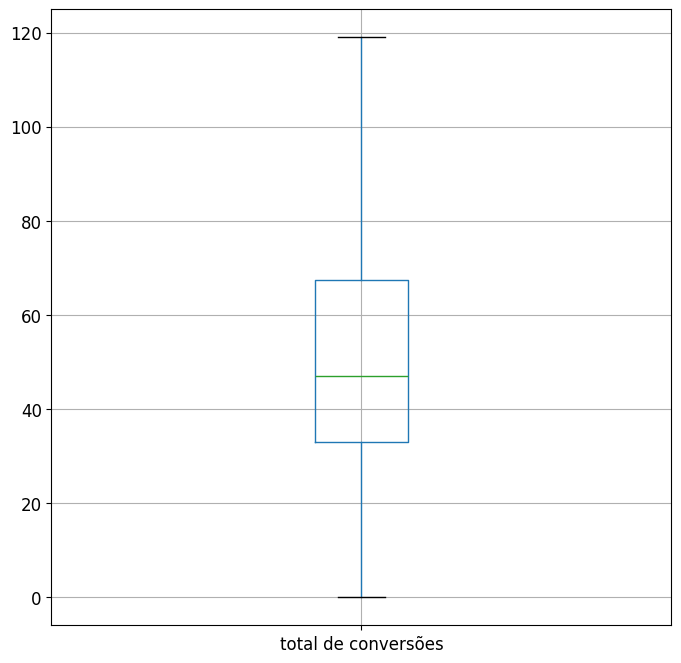

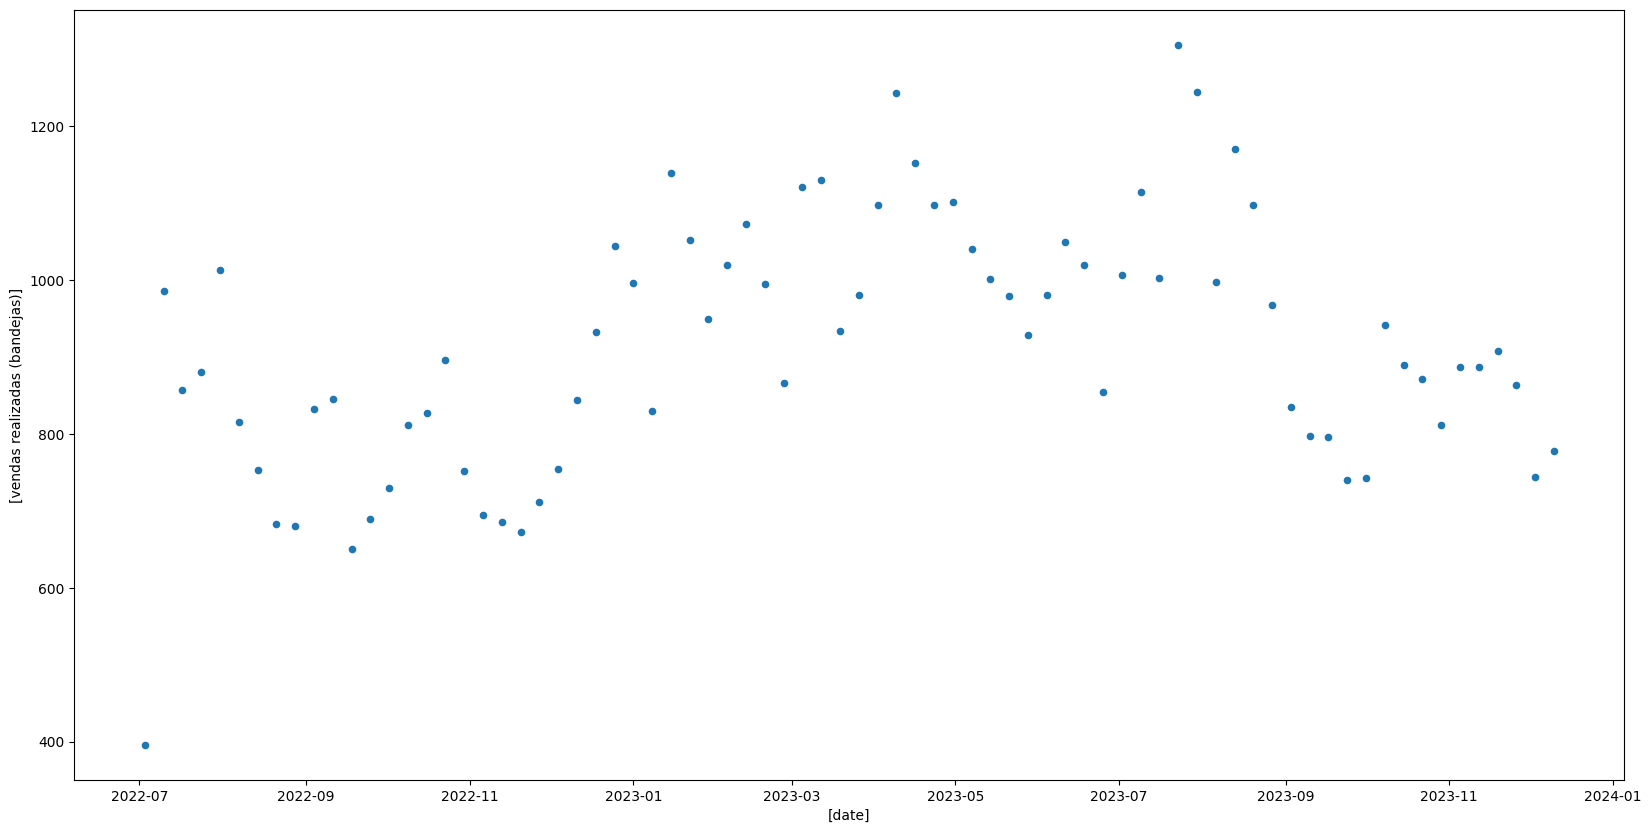

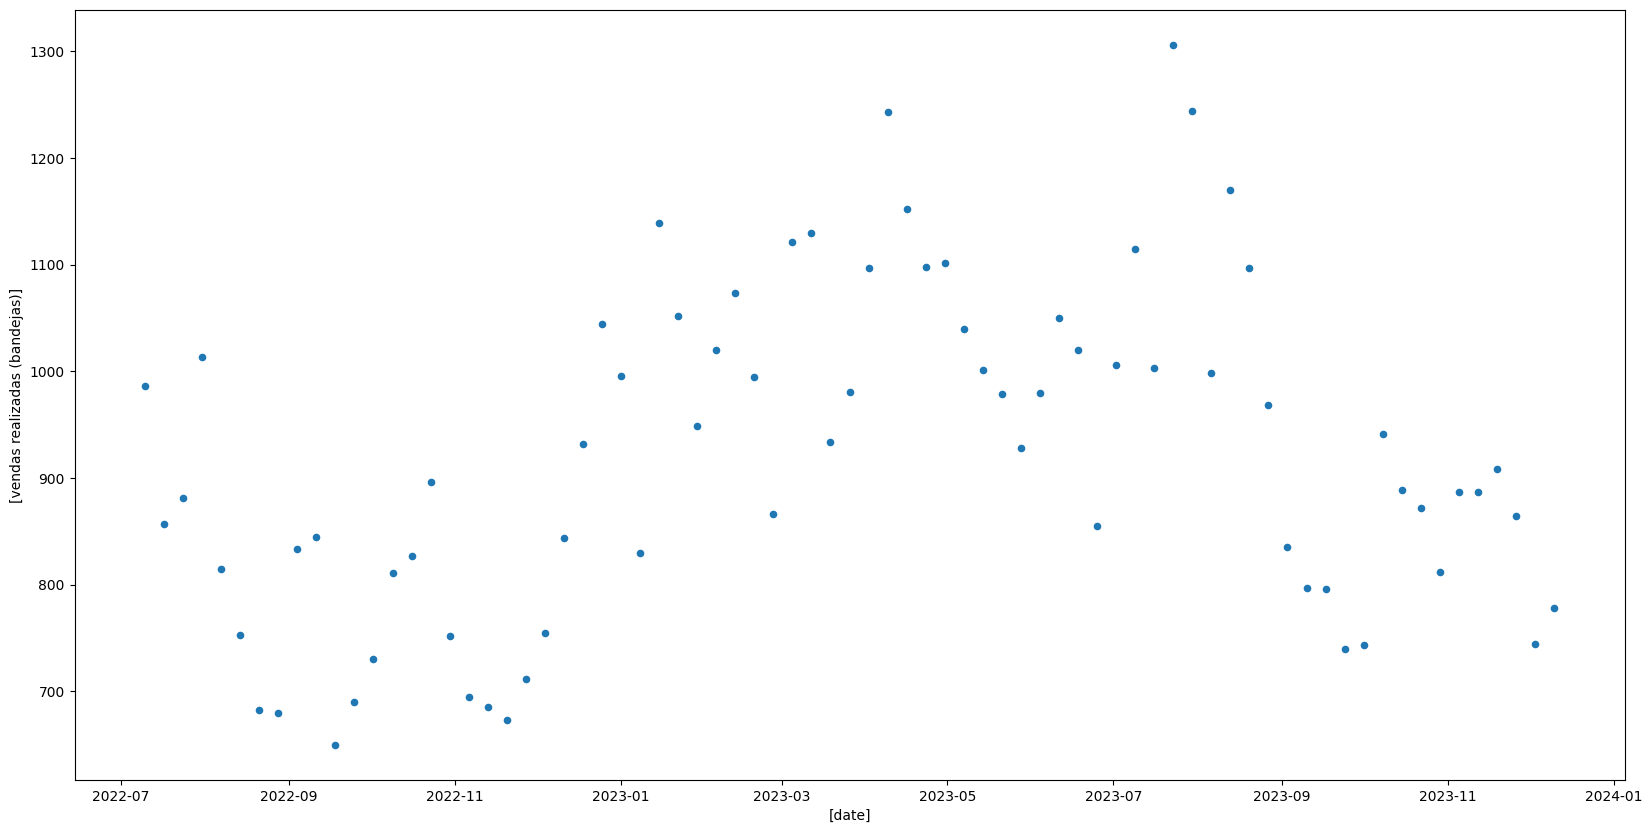

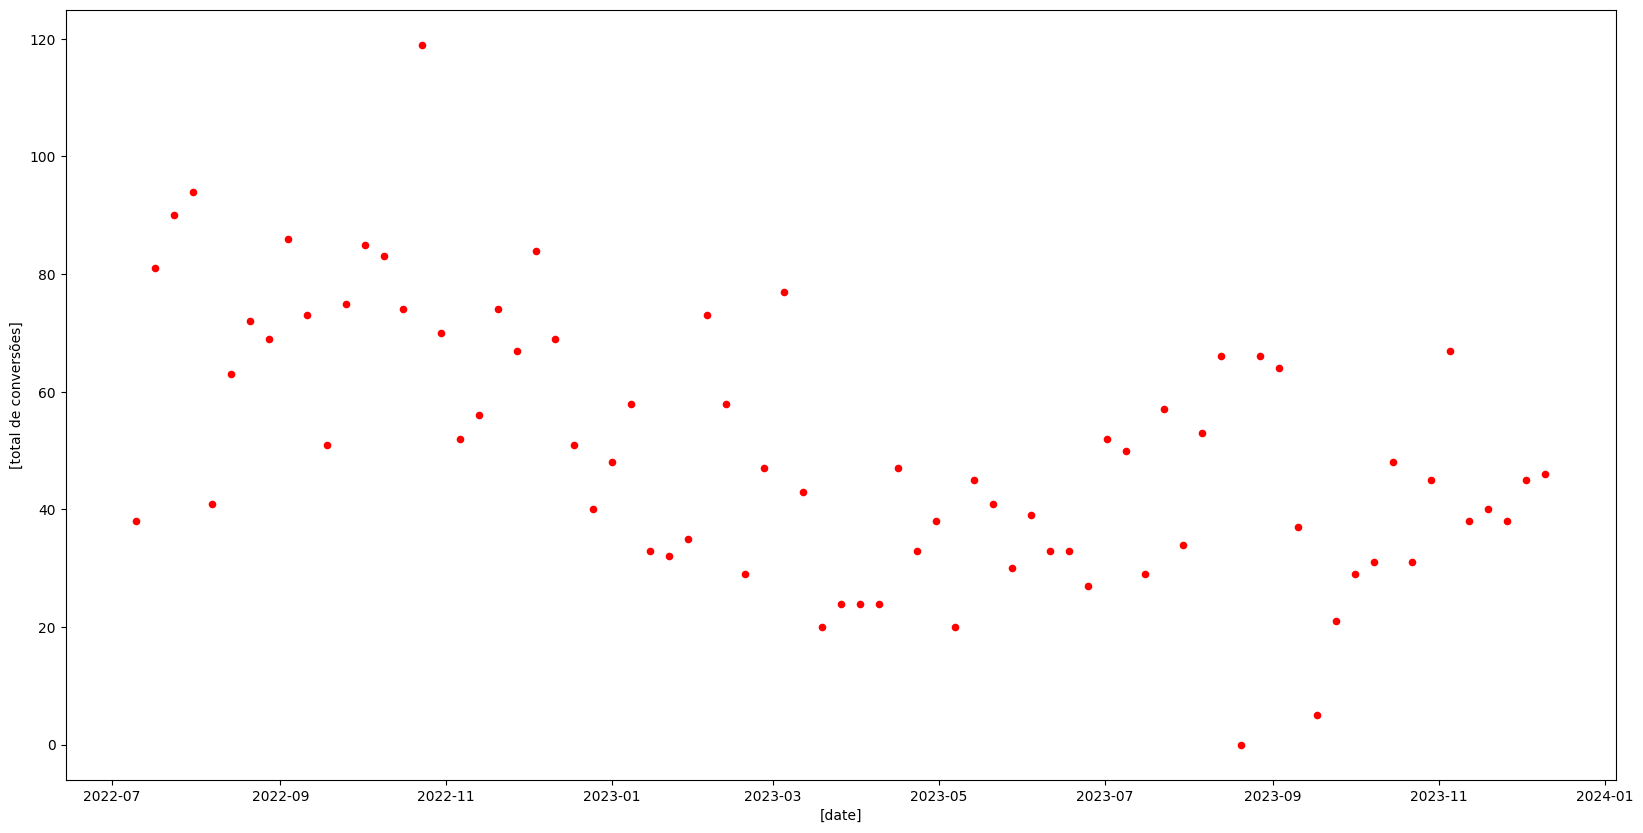

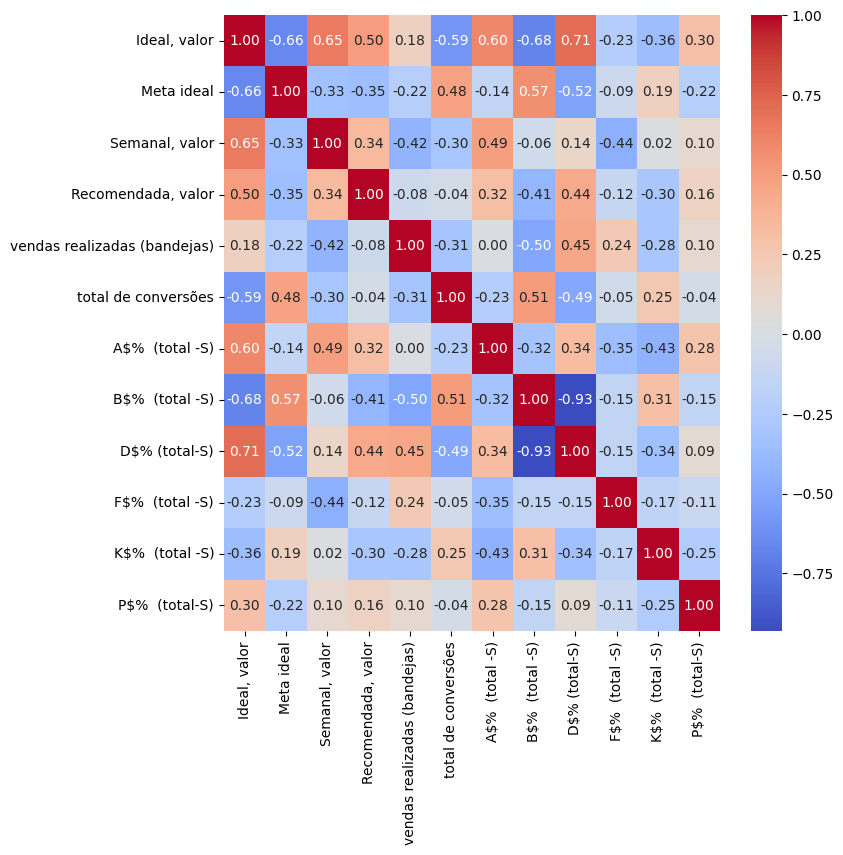

In [18]:
from matplotlib.colors import ListedColormap
corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(8,8)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

Correlações muito fracas com total de conversão:

- P
- F
- Recomendada, valor

Correlações fracas com total de conversão:

- A
- K
- Semanal, valor

Correlações moderadas com total de conversão:

- Ideal, valor
- Meta, ideal
- vendas realizadas;
- B;
- D;

In [19]:
df_correlacao.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'Recomendada, valor',
       'vendas realizadas (bandejas)', 'total de conversões',
       'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)',
       'F$%  (total -S)', 'K$%  (total -S)', 'P$%  (total-S)'],
      dtype='object')

In [20]:
rotulos = df_correlacao['total de conversões'].to_frame()
atributos_moderados_e_fracos = df_correlacao.drop(labels = ['total de conversões', 'P$%  (total-S)', 'F$%  (total -S)', 'Recomendada, valor'], axis=1)
atributos_moderados = atributos_moderados_e_fracos.drop(labels = ['A$%  (total -S)', 'K$%  (total -S)', 'Semanal, valor'], axis = 1)

In [21]:
atributos_moderados_e_fracos

,"Ideal, valor",Meta ideal,"Semanal, valor",vendas realizadas (bandejas),A$% (total -S),B$% (total -S),D$% (total-S),K$% (total -S)
1,33.92,310,8.872677,986,0.018014,0.776228,0.001708,0.045275
2,33.92,310,8.836661,857,0.000000,0.806860,0.011273,0.039504
3,33.92,310,8.611724,881,0.022437,0.752758,0.010623,0.019410
4,33.92,310,8.719288,1013,0.021077,0.735729,0.047528,0.031998
5,41.34,254,10.839958,815,0.021321,0.765057,0.008083,0.023054
...,...,...,...,...,...,...,...,...
71,48.89,215,11.114408,887,0.052488,0.637327,0.164064,0.014459
72,48.89,215,11.041927,908,0.049315,0.698160,0.111735,0.012478
73,48.89,215,11.255394,864,0.045977,0.648973,0.157668,0.017501
74,48.89,215,11.423441,744,0.046934,0.615194,0.173113,0.020787


In [22]:
atributos_moderados_e_fracos.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor',
       'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)',
       'D$% (total-S)', 'K$%  (total -S)'],
      dtype='object')

In [23]:
atributos_moderados

,"Ideal, valor",Meta ideal,vendas realizadas (bandejas),B$% (total -S),D$% (total-S)
1,33.92,310,986,0.776228,0.001708
2,33.92,310,857,0.806860,0.011273
3,33.92,310,881,0.752758,0.010623
4,33.92,310,1013,0.735729,0.047528
5,41.34,254,815,0.765057,0.008083
...,...,...,...,...,...
71,48.89,215,887,0.637327,0.164064
72,48.89,215,908,0.698160,0.111735
73,48.89,215,864,0.648973,0.157668
74,48.89,215,744,0.615194,0.173113


In [24]:
atributos_moderados.columns

Index(['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)',
       'B$%  (total -S)', 'D$% (total-S)'],
      dtype='object')

In [25]:
rotulos

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
71,38
72,40
73,38
74,45


## Modelagem

Modelo = transformador + estimador. Os transformadores personalizados serão aplicados ao data frame usando-se o FunctionTransformer, para que:

1. Eles sejam incluídos no Pipeline do ScikitLearn (o tratamento de dados seja automatizado sempre, a partir do data frame original);
3. Evitar rodar o mesmo código duas vezes (uma para treinamento, outra para teste);

In [26]:
df #a única modificação feita ao df original foi a tipagem da coluna de vendas realizadas (de float para int)

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.225852,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,0.230219,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594


### Criando funções transformadoras

In [27]:
def create_new_fields(df):
    dataset = df.copy()
    year = dataset['Ano']
    week = dataset['Semana']
    date_year_week = lambda x,y: create_date_from_year_week(x,y)
    date = list(map(date_year_week, year, week))
    dataset['date']= pd.Series(date)
    return dataset

def remove_outliers(df):
    dataset = df.copy()
    mask_outliers = dataset['vendas realizadas (bandejas)'] == 396
    dataset = dataset[~mask_outliers]
    return dataset

def select_labels(df):
    global rotulos_regressao
    dataset = df.copy()
    rotulos_regressao = dataset['total de conversões'].to_frame()
    return dataset

def select_moderate_and_weak_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)', 'K$%  (total -S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')
    
def select_moderate_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)', 'B$%  (total -S)', 'D$% (total-S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')

In [28]:
from sklearn.preprocessing import FunctionTransformer
criar_novos_campos = FunctionTransformer(create_new_fields)
remocao_outliers = FunctionTransformer(remove_outliers)
selecionar_rotulos = FunctionTransformer(select_labels)
selecionar_atributos_moderados_e_fracos = FunctionTransformer(select_moderate_and_weak_atributes, kw_args={'filter': True})
selecionar_atributos_moderados = FunctionTransformer(select_moderate_atributes, kw_args={'filter': True})

### Criando os transformadores

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

transformador_moderados_e_fracos = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados_e_fracos),
    ('normalizar os dados', RobustScaler())
])

transformador_moderados_somente = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados),
    ('normalizar os dados', RobustScaler())
])


In [30]:
transformador_moderados_e_fracos.fit_transform(df)

array([[-2.83790524e+00,  2.88888889e+00, -1.74382651e+00,
         3.74100719e-01, -5.01279856e-01,  1.33668978e+00,
        -1.16405846e+00,  1.53429452e+00],
       [-2.83790524e+00,  2.88888889e+00, -1.79148194e+00,
        -2.44604317e-01, -2.34422795e+00,  1.69298389e+00,
        -1.07479250e+00,  1.10262159e+00],
       [-2.83790524e+00,  2.88888889e+00, -2.08911765e+00,
        -1.29496403e-01, -4.87669536e-02,  1.06370697e+00,
        -1.08086235e+00, -4.00446539e-01],
       [-2.83790524e+00,  2.88888889e+00, -1.94678984e+00,
         5.03597122e-01, -1.87913916e-01,  8.65638183e-01,
        -7.36447880e-01,  5.41131473e-01],
       [-9.87531172e-01,  8.14814815e-01,  8.59268943e-01,
        -4.46043165e-01, -1.63005299e-01,  1.20675646e+00,
        -1.10456374e+00, -1.27845839e-01],
       [-9.87531172e-01,  8.14814815e-01,  6.23295876e-01,
        -7.43405276e-01,  6.74304097e-01,  9.93720747e-01,
        -9.65331652e-01,  6.93892427e-01],
       [-9.87531172e-01,  8.148148

### Importando os estimadores e criando o fluxo final

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Regressão com atributos moderados e fracos
regressao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Regressão linear atr. moderados e fracos', LinearRegression())
])

svr_polynomial_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('SVR Polinomial atr. moderados e fracos', SVR(kernel='poly', degree = 3))
])

arvore_decisao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Árvore atr. moderados e fracos', DecisionTreeRegressor(max_depth=3))
])

floresta_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Floresta atr. moderados e fracos', RandomForestRegressor())
])

modelos_atr_mod_e_fracos = [
    regressao_atr_mod_fraco,
    svr_polynomial_mod_fraco,
    arvore_decisao_atr_mod_fraco,
    floresta_atr_mod_fraco
]

#Regressão somente com atributos de corerlação moderada
regressao_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Reg. lin. só atr. mod', LinearRegression())
])

svr_polynomial_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('SVR pol. só atr. mod.', SVR(kernel='poly', degree = 3))
])

arvore_decisao_only_mod= Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Árvore só atr. mod.', DecisionTreeRegressor(max_depth=3))
])

floresta_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Floresta só atr. mod.', RandomForestRegressor())
])

modelos_only_mod = [
    regressao_only_mod,
    svr_polynomial_only_mod,
    arvore_decisao_only_mod,
    floresta_only_mod
]


### Train, test, validation splits

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [33]:
rotulos_regressao

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
71,38
72,40
73,38
74,45


In [34]:
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.225852,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,0.230219,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(remove_outliers(df), rotulos_regressao, test_size=0.2, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#X_train_only_mod, X_test_only_mod, y_train, y_test = train_test_split(atributos_moderados, rotulos, test_size=0.2, random_state=0)

In [36]:
X_train

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
28,2023,2,45.30,232,1051,9.998725,14.081212,1139,33,23.863042,...,0.220722,0.371107,0.016060,0.686577,0.143168,0.087910,0.022443,0.043842,0.021396,1.021396
50,2023,24,45.35,232,1020,10.298216,12.247273,1020,33,56.126224,...,0.227083,-0.028354,0.029115,0.634618,0.122928,0.129794,0.033347,0.050197,0.058200,1.058200
61,2023,35,45.35,232,1047,10.037154,15.414969,835,64,27.298574,...,0.221326,-0.136661,0.033458,0.649951,0.121792,0.127376,0.013673,0.053750,0.033762,1.033762
57,2023,31,45.35,232,1032,10.178948,13.196981,998,53,4.519131,...,0.224453,-0.198244,0.029238,0.636197,0.168694,0.106855,0.018115,0.040901,0.004548,1.004548
7,2022,33,41.34,254,1008,10.424412,12.317361,683,72,12.374799,...,0.252163,0.000000,0.016152,0.754748,0.046863,0.123150,0.023517,0.035571,0.018442,1.018442
51,2023,25,45.35,232,1004,10.466019,13.401852,855,27,10.892393,...,0.230783,-0.161345,0.019805,0.654288,0.107921,0.130217,0.038811,0.048958,0.012891,1.012891
69,2023,43,48.89,287,1241,11.285606,15.632974,812,45,25.299411,...,0.230837,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,0.262215,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847
66,2023,40,48.89,287,1259,11.126583,13.777216,941,31,12.762229,...,0.227584,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739


In [37]:
Y_train.shape

(60, 1)

### Metrics

In [38]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## Treinamento

In [39]:
from time import time

resultados_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_mod_e_fracos['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 15.788275049055807
MAE: 11.0379419112982
Tempo Treinamento: 0.02296733856201172

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 21.338403453545276
MAE: 15.676365702499458
Tempo Treinamento: 0.017517566680908203

Nome: Árvore atr. moderados e fracos
RMSE: 13.140515461425787
MAE: 9.776265172735764
Tempo Treinamento: 0.014997720718383789

Nome: Floresta atr. moderados e fracos
RMSE: 6.799347272594137
MAE: 5.4223333333333334
Tempo Treinamento: 0.25487208366394043


In [40]:
resultados_mod_e_fracos = pd.DataFrame(resultados_mod_e_fracos)
resultados_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.022967,15.788275,11.037942
1,SVR Polinomial atr. moderados e fracos,0.017518,21.338403,15.676366
2,Árvore atr. moderados e fracos,0.014998,13.140515,9.776265
3,Floresta atr. moderados e fracos,0.254872,6.799347,5.422333


In [41]:
resultados_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.254872,6.799347,5.422333
2,Árvore atr. moderados e fracos,0.014998,13.140515,9.776265
0,Regressão linear atr. moderados e fracos,0.022967,15.788275,11.037942
1,SVR Polinomial atr. moderados e fracos,0.017518,21.338403,15.676366


In [42]:
resultados_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_only_mod:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_only_mod['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_only_mod['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_only_mod['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_only_mod['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Reg. lin. só atr. mod
RMSE: 16.88425196203926
MAE: 12.790763973373773
Tempo Treinamento: 0.017998695373535156

Nome: SVR pol. só atr. mod.
RMSE: 21.310640772380157
MAE: 15.520777915668324
Tempo Treinamento: 0.016999244689941406

Nome: Árvore só atr. mod.
RMSE: 13.62543970361767
MAE: 9.781103848946987
Tempo Treinamento: 0.014002799987792969

Nome: Floresta só atr. mod.
RMSE: 6.304919375641003
MAE: 4.930499999999999
Tempo Treinamento: 0.20917534828186035


In [43]:
resultados_only_mod = pd.DataFrame(resultados_only_mod)
resultados_only_mod

,nome,tempo,RMSE_Treino,MAE_Treino
0,Reg. lin. só atr. mod,0.017999,16.884252,12.790764
1,SVR pol. só atr. mod.,0.016999,21.310641,15.520778
2,Árvore só atr. mod.,0.014003,13.625440,9.781104
3,Floresta só atr. mod.,0.209175,6.304919,4.930500


In [44]:
resultados_only_mod.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta só atr. mod.,0.209175,6.304919,4.930500
2,Árvore só atr. mod.,0.014003,13.625440,9.781104
0,Reg. lin. só atr. mod,0.017999,16.884252,12.790764
1,SVR pol. só atr. mod.,0.016999,21.310641,15.520778


## Teste

In [45]:
resultados_teste_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_mod_e_fracos['nome'].append(nome)

    #modelo.fit(X_train, Y_train) #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(X_test) #previsão
    metrica = mse(Y_test, predicao, squared=False)
    resultados_teste_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_test, predicao)
    resultados_teste_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 22.6992660181878
MAE: 16.515414251054594
Tempo Treinamento: 0.007995128631591797

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 18.659163009254232
MAE: 15.947086812268655
Tempo Treinamento: 0.0070133209228515625

Nome: Árvore atr. moderados e fracos
RMSE: 20.151997030969863
MAE: 16.73363211951447
Tempo Treinamento: 0.006989002227783203

Nome: Floresta atr. moderados e fracos
RMSE: 18.829288533204505
MAE: 15.625333333333334
Tempo Treinamento: 0.015997648239135742


In [46]:
resultados_teste_mod_e_fracos = pd.DataFrame(resultados_teste_mod_e_fracos)
resultados_teste_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.007995,22.699266,16.515414
1,SVR Polinomial atr. moderados e fracos,0.007013,18.659163,15.947087
2,Árvore atr. moderados e fracos,0.006989,20.151997,16.733632
3,Floresta atr. moderados e fracos,0.015998,18.829289,15.625333


In [47]:
resultados_teste_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
1,SVR Polinomial atr. moderados e fracos,0.007013,18.659163,15.947087
3,Floresta atr. moderados e fracos,0.015998,18.829289,15.625333
2,Árvore atr. moderados e fracos,0.006989,20.151997,16.733632
0,Regressão linear atr. moderados e fracos,0.007995,22.699266,16.515414


## Cross Validation

### Single model

In [66]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [67]:
#define predictor and response variables: X_Train, Y_train

#define cross validation method to use
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=300, test_size=0.15)



In [68]:
#build regression model
modelo = regressao_only_mod

from sklearn.model_selection import cross_validate

#use shufflesplit to evaluate model
cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)

#get columns names
cv_results = pd.DataFrame(cv_results) 
cv_results.columns


Index(['fit_time', 'score_time', 'test_neg_root_mean_squared_error',
       'test_neg_mean_absolute_error'],
      dtype='object')

In [69]:
#consolidate results
cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
Total_time = sum(cv_results['total_time'])


In [70]:

#calculate metrics
RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

Total_time, RMSE, MAE

(9.848947286605835, 18.413027627717977, 14.556157960171934)

### All models

In [71]:
resultados_cross_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_only_mod:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_only_mod['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_only_mod['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_only_mod['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_only_mod['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Reg. lin. só atr. mod


RMSE: 18.142602315539897
MAE: 14.536297340123031
Tempo Treinamento: 9.068740844726562

Nome: SVR pol. só atr. mod.
RMSE: 21.71143768129443
MAE: 16.846890312799907
Tempo Treinamento: 8.913746118545532

Nome: Árvore só atr. mod.
RMSE: 21.699338799788244
MAE: 16.723082429996108
Tempo Treinamento: 8.56851840019226

Nome: Floresta só atr. mod.
RMSE: 17.82493755039564
MAE: 14.312348148148146
Tempo Treinamento: 97.41146659851074


In [72]:
resultados_cross_only_mod = pd.DataFrame(resultados_cross_only_mod)
resultados_cross_only_mod

,nome,tempo,RMSE_Cross,MAE_Cross
0,Reg. lin. só atr. mod,9.068741,18.142602,14.536297
1,SVR pol. só atr. mod.,8.913746,21.711438,16.846890
2,Árvore só atr. mod.,8.568518,21.699339,16.723082
3,Floresta só atr. mod.,97.411467,17.824938,14.312348


In [73]:
resultados_cross_only_mod.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
3,Floresta só atr. mod.,97.411467,17.824938,14.312348
0,Reg. lin. só atr. mod,9.068741,18.142602,14.536297
2,Árvore só atr. mod.,8.568518,21.699339,16.723082
1,SVR pol. só atr. mod.,8.913746,21.711438,16.846890


In [74]:
resultados_cross_mod_e_fraco = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_atr_mod_e_fracos:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_mod_e_fraco['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_mod_e_fraco['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_mod_e_fraco['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_mod_e_fraco['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Regressão linear atr. moderados e fracos


RMSE: 17.15546769985544
MAE: 13.066771374009054
Tempo Treinamento: 9.213547945022583

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 23.002660953571162
MAE: 18.438245682347652
Tempo Treinamento: 8.601345539093018

Nome: Árvore atr. moderados e fracos
RMSE: 22.170770618314915
MAE: 17.597548873228302
Tempo Treinamento: 9.87674355506897

Nome: Floresta atr. moderados e fracos
RMSE: 17.264156393553524
MAE: 13.835540740740742
Tempo Treinamento: 111.26230669021606


In [75]:
resultados_cross_mod_e_fraco = pd.DataFrame(resultados_cross_mod_e_fraco)
resultados_cross_mod_e_fraco

,nome,tempo,RMSE_Cross,MAE_Cross
0,Regressão linear atr. moderados e fracos,9.213548,17.155468,13.066771
1,SVR Polinomial atr. moderados e fracos,8.601346,23.002661,18.438246
2,Árvore atr. moderados e fracos,9.876744,22.170771,17.597549
3,Floresta atr. moderados e fracos,111.262307,17.264156,13.835541


In [76]:
resultados_cross_mod_e_fraco.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
0,Regressão linear atr. moderados e fracos,9.213548,17.155468,13.066771
3,Floresta atr. moderados e fracos,111.262307,17.264156,13.835541
2,Árvore atr. moderados e fracos,9.876744,22.170771,17.597549
1,SVR Polinomial atr. moderados e fracos,8.601346,23.002661,18.438246


In [77]:
test_df_copy = df.copy()
test_df_copy = remove_outliers(test_df_copy)
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,0.262215,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.227335,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.225852,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,0.230219,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594


In [78]:
resultados_teste_df = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_df['nome'].append(nome)

    #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(test_df_copy) #previsão
    metrica = mse(test_df_copy['total de conversões'], predicao, squared=False)
    resultados_teste_df['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(test_df_copy['total de conversões'], predicao)
    resultados_teste_df['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_df['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 17.391579536448134
MAE: 12.13343637924948
Tempo Treinamento: 0.00999593734741211

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 20.83014263989094
MAE: 15.7305099244533
Tempo Treinamento: 0.01300501823425293

Nome: Árvore atr. moderados e fracos
RMSE: 14.810776959390742
MAE: 11.167738562091504
Tempo Treinamento: 0.010001182556152344

Nome: Floresta atr. moderados e fracos
RMSE: 10.387170933415893
MAE: 7.462933333333334
Tempo Treinamento: 0.018069744110107422


In [79]:
resultados_teste_df = pd.DataFrame(resultados_teste_df)
resultados_teste_df

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.009996,17.391580,12.133436
1,SVR Polinomial atr. moderados e fracos,0.013005,20.830143,15.730510
2,Árvore atr. moderados e fracos,0.010001,14.810777,11.167739
3,Floresta atr. moderados e fracos,0.018070,10.387171,7.462933


In [80]:
resultados_teste_df.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.018070,10.387171,7.462933
2,Árvore atr. moderados e fracos,0.010001,14.810777,11.167739
0,Regressão linear atr. moderados e fracos,0.009996,17.391580,12.133436
1,SVR Polinomial atr. moderados e fracos,0.013005,20.830143,15.730510


In [81]:
predicao_floresta = floresta_atr_mod_fraco.predict(test_df_copy)
predicao_floresta

array([ 55.77,  76.71,  78.15,  86.84,  50.37,  67.72,  72.15,  62.36,
        81.48,  71.67,  57.6 ,  71.5 ,  82.66,  79.48,  75.62, 106.77,
        69.5 ,  56.84,  60.8 ,  73.18,  61.63,  73.51,  73.98,  53.75,
        48.21,  59.02,  34.7 ,  34.7 ,  39.06,  33.71,  55.67,  49.79,
        37.01,  40.05,  41.71,  46.14,  24.76,  28.47,  26.84,  31.07,
        36.79,  38.6 ,  35.7 ,  39.13,  42.91,  36.52,  30.47,  38.12,
        30.47,  34.71,  34.36,  46.88,  34.53,  32.16,  33.37,  37.7 ,
        46.85,  32.41,  16.34,  37.19,  52.6 ,  30.42,  13.81,  22.58,
        26.3 ,  36.47,  38.78,  36.25,  40.5 ,  56.08,  43.67,  42.6 ,
        39.42,  41.44,  41.5 ])

In [82]:
test_df_copy['predicao floresta'] = predicao_floresta
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),predicao floresta
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,55.77
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,76.71
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,78.15
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,86.84
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,50.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,45,48.89,215,945,11.114408,16.690074,887,38,17.274874,...,0.000000,0.052488,0.637327,0.164064,0.084709,0.014459,0.046953,0.019848,1.019848,43.67
72,2023,46,48.89,215,951,11.041927,15.830892,908,40,12.316690,...,0.023926,0.049315,0.698160,0.111735,0.073075,0.012478,0.055237,0.013738,1.013738,42.60
73,2023,47,48.89,215,933,11.255394,15.258149,864,38,3.109620,...,-0.048315,0.045977,0.648973,0.157668,0.091022,0.017501,0.038859,0.003608,1.003608,39.42
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,41.44


In [83]:
pd.DataFrame.to_csv(test_df_copy, 'previsao_floresta.csv', sep =';', decimal = ',')